# Zomato Data Analysis Project

## Step 1 - Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 - Reading the csv data file

In [2]:
zomatoData = pd.read_csv(filepath_or_buffer='C:/Users/Asus/Downloads/EDGE Downloads/The iScale zomato Project/Zomato Data.csv',
                        sep=',', encoding='latin-1')

print('Data BEFORE removing duplicates:', zomatoData.shape)
print('Data AFTER removing duplicates:', zomatoData.drop_duplicates().shape)

zomatoData

Data BEFORE removing duplicates: (148, 7)
Data AFTER removing duplicates: (148, 7)


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
zomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
zomatoData.describe(include='all')

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
count,148,148,148,148,148.000000,148.000000,148
unique,145,2,2,20,NaN,NaN,4
top,San Churro Cafe,No,No,3.8/5,NaN,NaN,Dining
freq,2,90,140,19,NaN,NaN,110
mean,NaN,NaN,NaN,NaN,264.810811,418.243243,NaN
std,NaN,NaN,NaN,NaN,653.676951,223.085098,NaN
min,NaN,NaN,NaN,NaN,0.000000,100.000000,NaN
25%,NaN,NaN,NaN,NaN,6.750000,200.000000,NaN
50%,NaN,NaN,NaN,NaN,43.500000,400.000000,NaN
75%,NaN,NaN,NaN,NaN,221.750000,600.000000,NaN


## Changing the column - rate to float / integer

In [5]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

zomatoData['rate'] = zomatoData['rate'].apply(handleRate)
zomatoData.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
zomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## 1) What type of restaurant do the majority of customers order from?

## Type of Restaurant

In [7]:
zomatoData.groupby('listed_in(type)').size()

listed_in(type)
Buffet      7
Cafes      23
Dining    110
other       8
dtype: int64

Text(0.5, 0, 'Type of Restaurants')

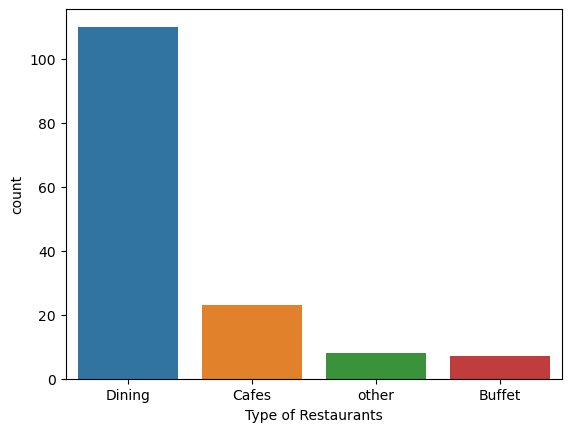

In [8]:
order = zomatoData['listed_in(type)'].value_counts().index

sns.countplot(x=zomatoData['listed_in(type)'], order=order)
plt.xlabel('Type of Restaurants')

### Result
- As per the above graph, the majority of the customers are ordering from Dining category

## 2) How many votes has each type of restaurant received from customers?

In [9]:
grouped_data = zomatoData.groupby('listed_in(type)')['votes'].sum()
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

Text(0, 0.5, 'Total Votes')

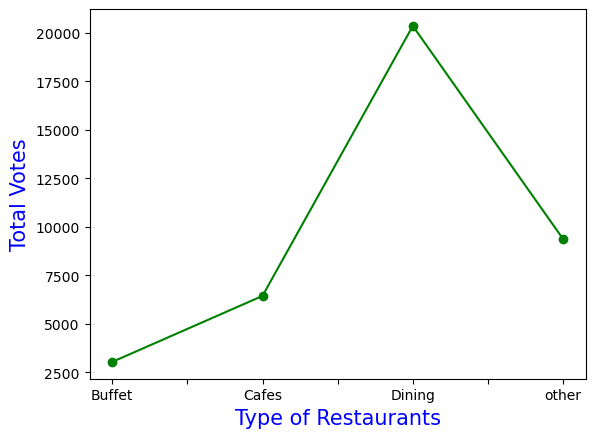

In [10]:
grouped_data.plot(kind='line', color='g', marker='o')
plt.xlabel('Type of Restaurants', color='b', size=15)
plt.ylabel('Total Votes', color='b', size=15)

### Result
- Dining restaurants has gained the highest votes among other restaurants

## 3) What are the ratings that the majority of restaurants have received?

In [11]:
zomatoData.nunique()

name                           145
online_order                     2
book_table                       2
rate                            19
votes                           90
approx_cost(for two people)     18
listed_in(type)                  4
dtype: int64

In [12]:
grouped_rate = zomatoData.groupby('rate').size()
grouped_rate

rate
2.6     1
2.8     2
2.9     7
3.0     2
3.1     7
3.2     7
3.3    14
3.4    12
3.5     6
3.6    11
3.7    15
3.8    20
3.9    10
4.0    10
4.1    11
4.2     8
4.3     1
4.4     2
4.6     2
dtype: int64

Text(0.5, 1.0, 'Rating Distribution')

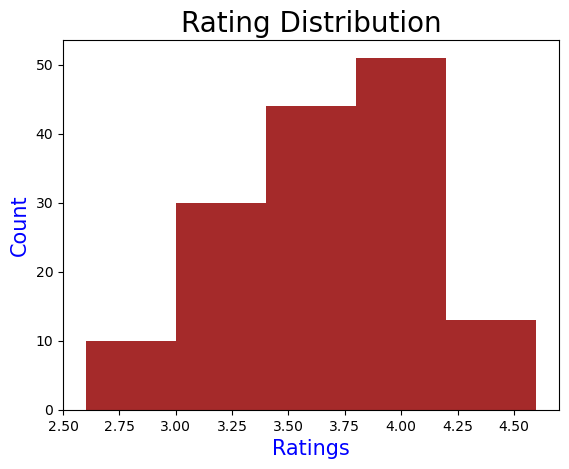

In [13]:
zomatoData['rate'].hist(bins=5, grid=False, color='brown')
plt.xlabel('Ratings', c='b', size=15)
plt.ylabel('Count', c='b', size=15)
plt.title('Rating Distribution', c='black', size=20)

### Result
- The ratings which the majority of the restaurants are getting is between 3.7 to 4.0

## 4) Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [14]:
zomatoData.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Average Spending per order')

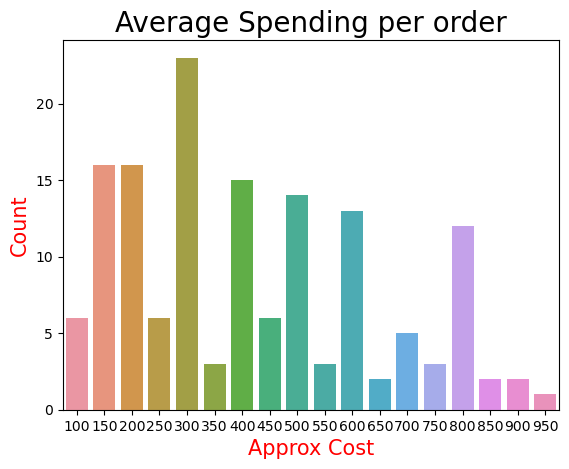

In [15]:
#zomatoData.groupby('approx_cost(for two people)').size().plot(kind='bar')

sns.countplot(x=zomatoData['approx_cost(for two people)'])
plt.xlabel('Approx Cost', c='r', size=15)
plt.ylabel('Count', c='r', size=15)
plt.title('Average Spending per order', c='black', size=20)

### Result
- The average spending of couples per order is 300 INR

## 5) Which mode (online or offline) has received the higher ratings?

In [16]:
zomatoData.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Ratings')

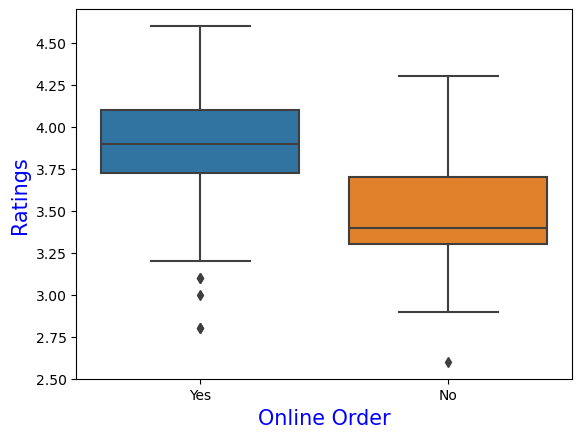

In [26]:
sns.boxplot(x=zomatoData['online_order'], y=zomatoData['rate'], orient='v' )
plt.xlabel('Online Order', c='b', size=15)
plt.ylabel('Ratings', c='b', size=15)

### Result
- Customers ordering online have given higher ratings to the restaurants

## 6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

In [18]:
zomatoData.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [27]:
cross_tab = pd.crosstab(zomatoData['listed_in(type)'], zomatoData['online_order'])
cross_tab

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


Text(0.5, 1.0, 'Online vs Offline')

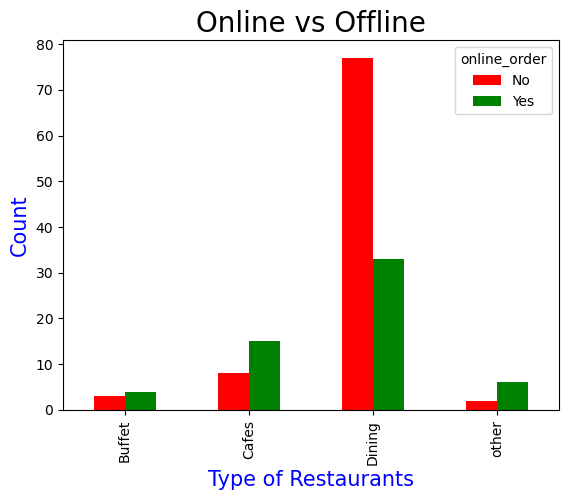

In [31]:
cross_tab.plot(kind='bar', color=['r','g'])
plt.xlabel('Type of Restaurants', color='b', size=15)
plt.ylabel('Count', color='b', size=15)
plt.title('Online vs Offline', color='black', size=20)

### Result
- Dining has more offline orders as compare to any other restaurants